In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset_path = "/content/drive/MyDrive/Untitled folder/natural_images"

In [3]:
dataset_path

'/content/drive/MyDrive/Untitled folder/natural_images'

In [4]:
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [5]:
count = 0
dirs = os.listdir("/content/drive/MyDrive/Untitled folder/natural_images")

for dir in dirs:
  dir_path = os.path.join("/content/drive/MyDrive/Untitled folder/natural_images", dir)
  if os.path.isdir(dir_path):
    files = list(os.listdir(dir_path))
    print(f"{dir} Folder has  {len(files)} images")
    count += len(files)

print(f"Images folder has: {count} images")

airplane Folder has  727 images
motorbike Folder has  788 images
fruit Folder has  1000 images
flower Folder has  843 images
car Folder has  968 images
person Folder has  986 images
dog Folder has  702 images
cat Folder has  885 images
Images folder has: 6899 images


In [6]:
base_dir = "/content/drive/MyDrive/Untitled folder/natural_images"
img_size = 180
batch = 32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = "training",
    batch_size = batch,
    image_size = (img_size, img_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
    batch_size = batch,
    image_size = (img_size, img_size)
    )

Found 6899 files belonging to 8 classes.
Using 5520 files for training.
Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [8]:
import matplotlib.pyplot as plt



In [9]:
natural_images = train_ds.class_names
natural_images

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

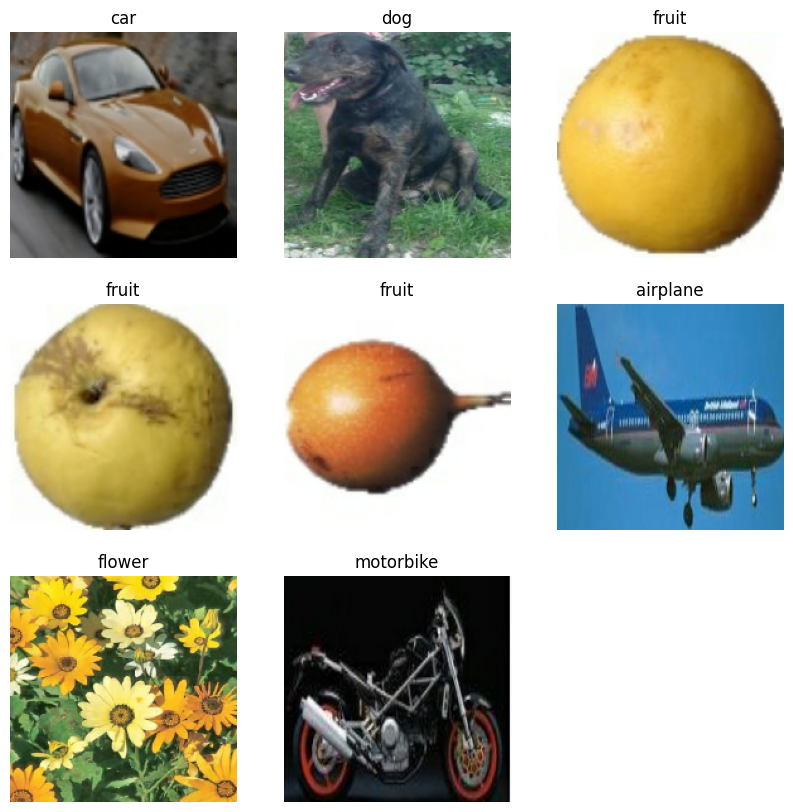

In [11]:
i = 0
plt.figure(figsize = (10,10))

for images,labels in train_ds.take(5):
  for i in range(8):
    plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(natural_images[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)


In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [16]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape =(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


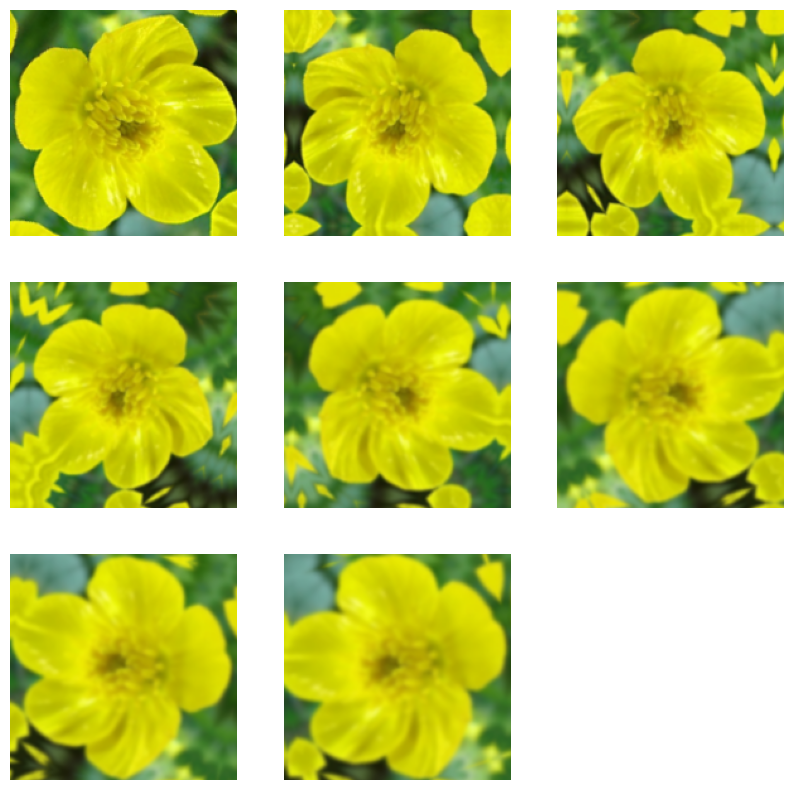

In [19]:
i = 0
plt.figure(figsize = (10,10))

for images,labels in train_ds.take(1):
  for i in range(8):
    images = data_augmentation(images)
    plt.subplot(3,3, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [37]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding= "same", activation = "relu"),
    MaxPooling2D(),
    Conv2D(32,3,padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64,3,padding="same", activation = "relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(5)
])

In [39]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(train_ds, epochs = 15,  validation_data = val_ds)

Epoch 1/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.5650 - loss: 1.2040 - val_accuracy: 0.8231 - val_loss: 0.4685
Epoch 2/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8428 - loss: 0.4375 - val_accuracy: 0.8492 - val_loss: 0.4169
Epoch 3/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 172s 995ms/step - accuracy: 0.8760 - loss: 0.3445 - val_accuracy: 0.8963 - val_loss: 0.3127
Epoch 4/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 168s 969ms/step - accuracy: 0.9016 - loss: 0.2910 - val_accuracy: 0.9028 - val_loss: 0.2718
Epoch 5/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 167s 968ms/step - accuracy: 0.9082 - loss: 0.2493 - val_accuracy: 0.8985 - val_loss: 0.2821
Epoch 6/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 169s 979ms/step - accuracy: 0.9177 - loss: 0.2296 - val_accuracy: 0.8956 - val_loss: 0.2985
Epoch 7/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 167s 965ms/step - accuracy: 0.9201 - loss: 0.2132 - val_accuracy: 0.8905 - val_loss: 0.3051
Epoch 8/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 167s 962ms/step - accuracy: 0.9239 - loss:

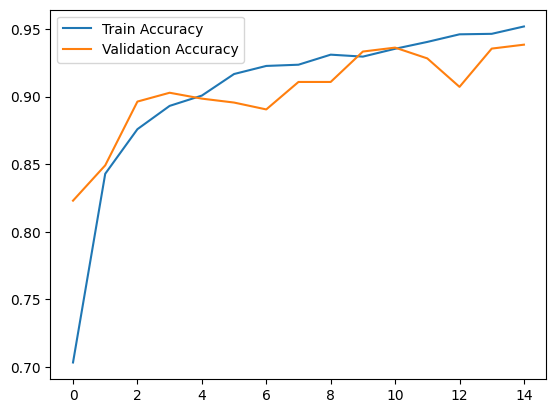

In [43]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [44]:
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array, 0)

  predictions=model.predict(input_image_exp_sim)
  result = tf.nn.softmax(predictions[0])
  outcome = "The Image belongs to " + natural_images[n.argmax(result)] + "with a score of " + str(np.max(result)*100)
  return outcome

In [49]:
classify_images("/content/car bmw m5 competition.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


'The Image belongs to airplane with a score of 72.75969386100769'

In [50]:
classify_images("/content/cat.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'The Image belongs to cat with a score of 58.7318480014801'

In [51]:
classify_images("/content/dog.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to flower with a score of 79.76377010345459'

In [52]:
classify_images("/content/flower.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'The Image belongs to flower with a score of 99.99563694000244'

In [53]:
classify_images("/content/fruit.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to cat with a score of 77.57881283760071'

In [54]:
classify_images("/content/motorbike.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to flower with a score of 99.78930354118347'

In [55]:
classify_images("/content/person.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to person with a score of 77.68324613571167'

In [56]:
classify_images("/content/plane.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'The Image belongs to dog with a score of 62.049806118011475'